<a href="https://colab.research.google.com/github/ImenBoukhari/MachineLearning/blob/main/tp3_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1- 1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
url="https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,index_col='Id')
#2-Afficher les 10 premières lignes du DataFrame.
df[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [ ]:
#3-Afficher les dimensions du dataframe.
df.shape

(150, 5)

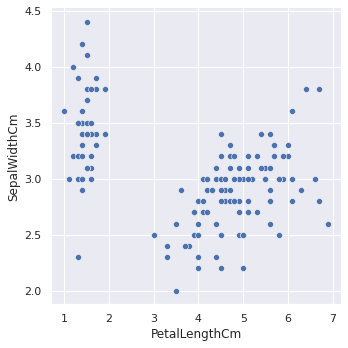

In [ ]:
#4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
sns.relplot(data=df, x="PetalLengthCm", y="SepalWidthCm")

In [ ]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )
df[df["Species"]=='Iris-setosa']=0
df[df["Species"]=='Iris-versicolor']=1
df[df["Species"]=='Iris-virginica']=2
#6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
df[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,0
7,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,0


In [ ]:
#7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size = .70)

In [ ]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
X_train[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
119,2.0,2.0,2.0,2.0
19,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
46,0.0,0.0,0.0,0.0
60,1.0,1.0,1.0,1.0
40,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0
118,2.0,2.0,2.0,2.0
140,2.0,2.0,2.0,2.0


In [ ]:
X_test[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
15,0.0,0.0,0.0,0.0
99,1.0,1.0,1.0,1.0
76,1.0,1.0,1.0,1.0
17,0.0,0.0,0.0,0.0
132,2.0,2.0,2.0,2.0
57,1.0,1.0,1.0,1.0
142,2.0,2.0,2.0,2.0
45,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0


In [ ]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150)

from sklearn.neural_network import MLPClassifier
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150).fit(X_train.astype('int'), y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [ ]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.
from sklearn import metrics 
metrics.accuracy_score(y_test.astype('int'),predModel)

1.0

In [ ]:
#11-Afficher la matrice de confusion associée à notre cas.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
metrics.confusion_matrix(y_test.astype('int'),predModel)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]])

#12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.
L'axe des x présente les valeurs prédite et des Y présente les valeurs réelles. Les valeurs (pour les X et les Y ) sont ordonnées respectivement:Setosa ,Versicolor et Virginica. 
D'après la matrice de confusion => 14 valeurs classées comme Setosa sont en réalité Virginica, et 13 comme Virginica mais elles sont Setosa et les 18 autres sont bien classées .

In [ ]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=0.7).fit(X_train.astype('int'), y_train.astype('int'))
predModel=TrainModel.predict(X_test.astype('int'))
predModel

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2])

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

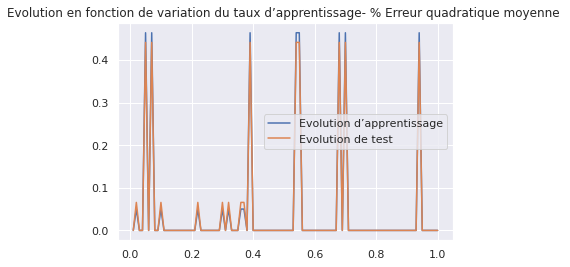

In [ ]:

#14-Nous allons étudier la variation du paramètre de taux d’apprentissage, donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test en fonction de variation du taux d’apprentissage.
loss_values=[]
listLR=[]
Trainloss_values=[]
for lR in range(1,101):
  TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=150,learning_rate_init=lR/100).fit(X_train.astype('int'), y_train.astype('int'))
  #évolution d’apprentissage
  TrainpredModel=TrainModel.predict(X_train.astype('int'))
  Trainloss_values.append(metrics.mean_squared_log_error(y_train.astype('int'),TrainpredModel))
  #évolution de test
  predModel=TrainModel.predict(X_test.astype('int'))
  loss_values.append(metrics.mean_squared_log_error(y_test.astype('int'),predModel))
  listLR.append(lR/100)
plt.plot(listLR,Trainloss_values,label="Evolution d’apprentissage")
plt.plot(listLR,loss_values,label="Evolution de test")
plt.legend()
plt.title('Evolution en fonction de variation du taux d’apprentissage- % Erreur quadratique moyenne ')
plt.show()


In [ ]:
#15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci ?
TrainModel=MLPClassifier(hidden_layer_sizes=(len(X_train.columns),),solver="lbfgs",epsilon=0.07,max_iter=1500).fit(X_train.astype('int'), y_train.astype('int'))
#fit model on the train dataset
TrainpredModel=TrainModel.predict(X_train.astype('int'))
metrics.accuracy_score(y_train.astype('int'),TrainpredModel)




/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
#evaluate on the test dataset
predModel=TrainModel.predict(X_test.astype('int'))
metrics.accuracy_score(y_test.astype('int'),predModel)

1.0

In [ ]:
#16-Tester d’autres classifieurs de type réseau de neurones (Dynamique/Récurrent et Non récurrent) .
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN
Seqmodel = Sequential()
Seqmodel.add(Dense(len(X_train.columns),input_shape=(len(X_train.columns),),activation='relu'))
Seqmodel.add(Dense(1,activation='softmax'))
Seqmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model = Seqmodel.fit(X_train.astype('int'), y_train.astype('int'))



4/4 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - acc: 0.3048


In [ ]:
Seqmodel = SimpleRNN(len(X_train.columns),return_sequences=True, return_state=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train.astype('float'), y_train.astype('float'))

4/4 [==============================] - 0s 4ms/step - loss: -5.4355 - acc: 0.3429